### PRAGADEESH M
## 2252299126

##### 1. Import Libraries


In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
%matplotlib inline

##### 2. Load your data and print the space of training and test samples

In [2]:
(x_train,y_train), (x_test, y_test)= cifar10.load_data()
print('X_train:', x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0], 'test samples')

X_train: (50000, 32, 32, 3)
50000 train samples
10000 test samples


##### 3. Print the shape of one image (is it 32* 32 * 3 numpy array ?)

In [3]:
x_train[444].shape

(32, 32, 3)

##### 4. Display one image using imshow() function

[9]


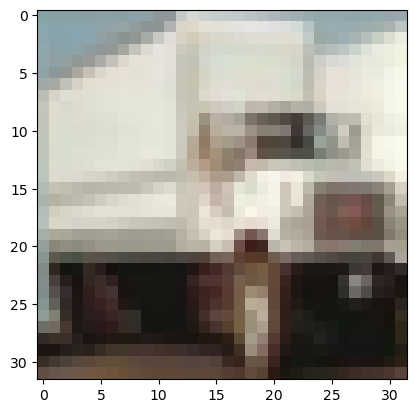

In [4]:
print(y_train[444])
plt.imshow(x_train[444])

##### 5. Convert y_train and y_test into categorical values


In [5]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# now instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

##### 6. Convert train data into float and scale

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

##### 7. Build your first CNN

In [7]:
model = Sequential()
model.add(Conv2D(32, (5, 5), strides=(2, 2), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (5, 5), strides=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

##### 8. Print summary and verify your configuration (total params:181,162)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense (Dense)               (None, 512)               147968    
                                                        

##### 9. Compile and fit and validate your model with the following parameters

In [10]:
from tensorflow.keras.optimizers import RMSprop

In [10]:
model.compile(optimizer=RMSprop(learning_rate=0.0005,weight_decay=1e-6),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=32,epochs=15,shuffle=True)

Epoch 1/15
1563/1563 [==============================] - 37s 22ms/step - loss: 1.7708 - accuracy: 0.3546
Epoch 2/15
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4996 - accuracy: 0.4556
Epoch 3/15
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4007 - accuracy: 0.4986
Epoch 4/15
1563/1563 [==============================] - 35s 22ms/step - loss: 1.3370 - accuracy: 0.5237
Epoch 5/15
1563/1563 [==============================] - 35s 22ms/step - loss: 1.2920 - accuracy: 0.5411
Epoch 6/15
1563/1563 [==============================] - 35s 22ms/step - loss: 1.2549 - accuracy: 0.5554
Epoch 7/15
1563/1563 [==============================] - 35s 22ms/step - loss: 1.2214 - accuracy: 0.5699
Epoch 8/15
1563/1563 [==============================] - 35s 22ms/step - loss: 1.1981 - accuracy: 0.5761
Epoch 9/15
1563/1563 [==============================] - 35s 22ms/step - loss: 1.1790 - accuracy: 0.5846
Epoch 10/15
1563/1563 [==============================] - 35s 22m

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.1265 - accuracy: 0.6035


[1.1264910697937012, 0.6035000085830688]

#### Part-II Model Improvements

##### 1. Build a more complicated model with the following pattern: Conv -> Conv-> MaxPool -> Conv-> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

##### 2. Use strides of 1 for all convolutional layers.

In [19]:
model1 = Sequential()
model1.add(Conv2D(32, (5, 5), strides=(1,1), activation='relu', padding='same', input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (5, 5), strides=(1,1), activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(10, activation='softmax'))

#####  3. How many parameters does your model have? How does that compare to the previous model?

In [20]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               4194816   
                                                      

##### 4. Train it for 5 epochs. What do you notice about the training time, loss and accuracy numbers (on both the training and validation sets)?

In [ ]:
model1.compile(optimizer=RMSprop(learning_rate=0.0005,weight_decay=1e-6),loss='categorical_crossentropy',metrics=['accuracy'])
model1.fit(x_train,y_train,batch_size=32,epochs=5,validation_split=0.9,shuffle=True)

Epoch 1/5
157/157 [==============================] - ETA: 0s - loss: 1.0605 - accuracy: 0.6251

##### 5. try different structures 

In [7]:
model2 = Sequential()
model2.add(Conv2D(filters=64, kernel_size=(5,5),strides=(1,1),activation='relu', padding='same', input_shape=(32,32,3)))
model2.add(Conv2D(filters=32, kernel_size=(4,4),strides=(1,1),activation='relu', padding='same', input_shape=(32,32,3)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters=64, kernel_size=(5,5),strides=(1,1),activation='relu', padding='same', input_shape=(32,32,3)))
model2.add(Conv2D(filters=32, kernel_size=(4,4),strides=(1,1),activation='relu', padding='same', input_shape=(32,32,3)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [8]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        32800     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        32800     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                   

In [ ]:
model2.compile(optimizer=RMSprop(learning_rate=0.0005,weight_decay=1e-6),loss='categorical_crossentropy',metrics=['accuracy'])
model2.fit(x_train,y_train,batch_size=32,epochs=5,shuffle=True)

Epoch 1/5
1563/1563 [==============================] - 617s 393ms/step - loss: 1.5218 - accuracy: 0.4480
Epoch 2/5
1563/1563 [==============================] - 1245s 797ms/step - loss: 0.9904 - accuracy: 0.6509
Epoch 3/5
  65/1563 [>.............................] - ETA: 10:30 - loss: 0.8259 - accuracy: 0.7139